In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading dataset
data=pd.read_excel("C:/Users/risha/Downloads/Data1.xlsx")

In [3]:
data.head()

,Variable 1,Variable 2,Class
0,1.9743,4.6057,1
1,2.2853,3.8689,1
2,2.9881,4.5751,1
3,2.9420,3.5619,1
4,3.5872,2.8660,1


In [4]:
#assigning X train, Y train, X test
tr=data.to_numpy()
X=tr[:,0:2]
Y=tr[:,-1]

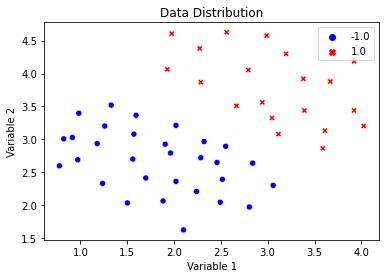

In [5]:
#Plotting Data
def plot(x, y):
    ax=sns.scatterplot(x=x[:,0], y=x[:, 1], style=y, hue=y, palette=['blue', 'red']).set_title("Data Distribution")
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
plot(X,Y)    

In [6]:
# For optimization
from scipy.optimize import Bounds, BFGS                     
from scipy.optimize import LinearConstraint, minimize 

In [7]:
#Defining Lagrangian Dual
ZERO= 1e-7
def lagrange_dual(lambd, x, t):
    result = 0
    ind = np.where(lambd > ZERO)[0]
    for i in ind:
        for k in ind:
            result = result + lambd[i]*lambd[k]*t[i]*t[k]*np.dot(x[i, :], x[k, :]) 
    result = 0.5*result - sum(lambd)     
    return result

In [8]:
#optimizing lambda, defining constraints
def optimize_lambda(x, t, C):
    m, n = x.shape
    lambda_0 = np.random.rand(m)*C
    linear_constraint = LinearConstraint(t, [0], [0])
    bounds_lambda = Bounds(np.zeros(m), np.full(m, C))
    result = minimize(lagrange_dual, lambda_0, args = (x, t), method='trust-constr', hess=BFGS(), constraints=[linear_constraint],
                      bounds=bounds_lambda)
    lambd = result.x
    return lambd

In [9]:
#Model parameters, weights and bias calculation
def get_w(lambd, t, x):
    m = len(x)
    w = np.zeros(x.shape[1])
    for i in range(m):
        w = w + lambd[i]*t[i]*x[i, :]        
    return w
 
def get_b(lambd, t, x, w, C):
    C_numeric = C-ZERO
    ind = np.where((lambd > ZERO)&(lambd < C_numeric))[0]
    b = 0.0
    for s in ind:
        b = b + t[s] - np.dot(x[s, :], w)  
    b = b / len(ind)
    return b

In [10]:
def classify_points(x, w, b):
    # get y(x_test)
    predicted = np.sum(x*w, axis=1) + b
    predicted = np.sign(predicted)
    predicted[predicted==0] = 1
    return predicted

In [11]:
def plot_x(x, t, lambd=[], C=0):
    sns.scatterplot(x[:,0], x[:, 1], style=t,
    hue=t, markers=['s', 'P'],
    palette=['magenta', 'green'])
    if len(lambd) > 0:
        lambd_str = np.char.mod('%.1f', np.round(lambd, 1))
        ind = np.where(lambd > ZERO)[0]
        for i in ind:   
            plt.gca().text(x[i,0], x[i, 1]-.25, lambd_str[i] )

In [12]:
#Plotting Margin and Hyperplane
def plot_hyperplane(w, b):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')

def plot_margin(w, b):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1/w[1] - b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green') 
    yneg_coord = -1/w[1] - b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='blue')

C:\Users\risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


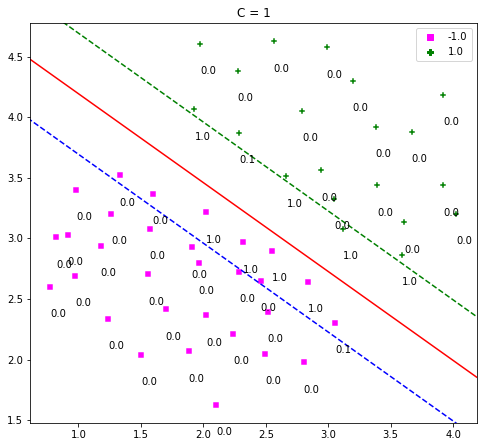

In [15]:
#Plotting
def display_SVM_result(x, t, C):
    # Get the alphas
    lambd = optimize_lambda(x, t, C)   
    # Get the weights
    w = get_w(lambd, t, x)
    b = get_b(lambd, t, x, w, C)
    plot_x(x, t, lambd, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, b)
    plot_margin(w, b)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Get the misclassification error and display it as title
    predictions = classify_points(x, w, b)
    title = 'C = ' + str(C) 
#     title = title + ',  total SV = ' + str(len(alpha[alpha > ZERO]))
    plt.title(title)
    return w,b
    
fig = plt.figure(figsize=(8,25))

i=0
C_array = [1]

for C in C_array:
    fig.add_subplot(311+i)    
    w,b= display_SVM_result(X, Y, C)  
    i = i + 1

In [17]:
w,b

(array([1.46838317, 2.00128397]), -9.860366657974234)